# Tutorial

## Introduction

This notebook will provide a step-by-step tutorial for using the [caterpillard](https://pypi.org/project/caterpillard/) package to create the Caterpillar Diagram as proposed in the [research article](https://doi.org/10.1177/20597991221144577).

A Caterpillar Diagram is a visualization technique used for analyzing univariate time-series data. It consists of a series of colored circles with varying radii. The circle's color represents the direction of change in the time-series data, and the circle's size shows its variation.

It implements the innovative and intuitive **_Difference of Differences (DoD)_** approach to create a color schema. As proposed, it segregates the time-series data under analysis into a cohort of three consecutive time units. Further, it utilizes the unsigned differences between observations to assign a size to each cohort. This novel visualization technique can segregate the time-series data using seven colors or five stages of **_Aggressive, Ascent, Descent, Controlled, and Status Quo_**. 

Further, the proposed mechanism utilizes the accumulated color information regarding each cohort to forecast the next step transition using a stationary matrix of Markov Chains.

In [1]:
import numpy as np
import pandas as pd

from caterpillard import CaterpillarDiagram

## Relative Analysis

The Caterpillar Diagram can analyze a collection of time-series dataset together and produce a visualization for the user-defined data series out of them. This kind of analysis is termed here as relative analysis.

An example dataset is provided with the package which can be imported using `from caterpillard import load_dataframe`

In [2]:
from caterpillard import load_dataframe

### DataFrame info

As shown in the output of `info` command above, the dataframe is a wide form dataset where each column stores the repeated response of each item (row) over the years. The package requires the dataframe in this format to create the diagram. This dataframe has 205 distinct entities in the index which will serve as an identification information for selecting the collection of time-series to work with. There are 49 columns in the dataset each reporting a numeric observation. 

In [3]:
df = load_dataframe()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 4 to 499
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1970    205 non-null    int64
 1   1971    205 non-null    int64
 2   1972    205 non-null    int64
 3   1973    205 non-null    int64
 4   1974    205 non-null    int64
 5   1975    205 non-null    int64
 6   1976    205 non-null    int64
 7   1977    205 non-null    int64
 8   1978    205 non-null    int64
 9   1979    205 non-null    int64
 10  1980    205 non-null    int64
 11  1981    205 non-null    int64
 12  1982    205 non-null    int64
 13  1983    205 non-null    int64
 14  1984    205 non-null    int64
 15  1985    205 non-null    int64
 16  1986    205 non-null    int64
 17  1987    205 non-null    int64
 18  1988    205 non-null    int64
 19  1989    205 non-null    int64
 20  1990    205 non-null    int64
 21  1991    205 non-null    int64
 22  1992    205 non-null    int64
 23  1994    205 non

### Initialization

The generation of the Caterpillar diagram requires a series of steps. The first step is to initialize the `CaterpillarDiagram` class with the required parameters, `data,` `relative,` and the optional `output_path`.

Select the sub-collection of data series from the data frame as the input for the `data` parameter and assign `True` to the `relative` parameter because we are performing the relative analysis.

Here, we select indexes (4, 19, 25, 92, 122, 129, 141, 153, 186) from the data frame for relative analysis.

In [4]:
df_subset = df[df.index.isin([4, 19, 25, 92, 122, 129, 141, 153, 186])]
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4 to 186
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1970    9 non-null      int64
 1   1971    9 non-null      int64
 2   1972    9 non-null      int64
 3   1973    9 non-null      int64
 4   1974    9 non-null      int64
 5   1975    9 non-null      int64
 6   1976    9 non-null      int64
 7   1977    9 non-null      int64
 8   1978    9 non-null      int64
 9   1979    9 non-null      int64
 10  1980    9 non-null      int64
 11  1981    9 non-null      int64
 12  1982    9 non-null      int64
 13  1983    9 non-null      int64
 14  1984    9 non-null      int64
 15  1985    9 non-null      int64
 16  1986    9 non-null      int64
 17  1987    9 non-null      int64
 18  1988    9 non-null      int64
 19  1989    9 non-null      int64
 20  1990    9 non-null      int64
 21  1991    9 non-null      int64
 22  1992    9 non-null      int64
 23  1994    9 non-nul

In [5]:
cd = CaterpillarDiagram(data=df_subset, relative=True, output_path="/tmp/tut_output/")

### Data Summary
Use the `data_summary` method available in the class object to get info regarding the input data for analysis

In [6]:
cd.data_summary()

Summarizing Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4 to 186
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1970    9 non-null      int64
 1   1971    9 non-null      int64
 2   1972    9 non-null      int64
 3   1973    9 non-null      int64
 4   1974    9 non-null      int64
 5   1975    9 non-null      int64
 6   1976    9 non-null      int64
 7   1977    9 non-null      int64
 8   1978    9 non-null      int64
 9   1979    9 non-null      int64
 10  1980    9 non-null      int64
 11  1981    9 non-null      int64
 12  1982    9 non-null      int64
 13  1983    9 non-null      int64
 14  1984    9 non-null      int64
 15  1985    9 non-null      int64
 16  1986    9 non-null      int64
 17  1987    9 non-null      int64
 18  1988    9 non-null      int64
 19  1989    9 non-null      int64
 20  1990    9 non-null      int64
 21  1991    9 non-null      int64
 22  1992    9 non-null      int64
 23  

### Generate Color Schema

In [7]:
cd.color_schema()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 46
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   d11         423 non-null    int64 
 1   d12         423 non-null    int64 
 2   d2          423 non-null    int64 
 3   data_index  423 non-null    int64 
 4   Cohort      423 non-null    object
 5   color       423 non-null    object
 6   level       423 non-null    object
 7   n_color     423 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 29.7+ KB


The `color_schema` method has implemented the DoD approach and created a data frame `complete_cohort_df` available as the instance attribute to the class object `cd` as shown below.

The column $d_{11}$, $d_{12}$ are the first differences and $d_2$ is the second difference, respectively. The `data_index` column shows the index of the subset of the data frame that we selected earlier.

The `Cohort` column marks the cohort number for which the row of this data frame (`complet_cohort_df`) is storing the information. The columns `color,` `level,` and `n_color` stores the color and level information for the particular cohort as assigned by the DoD approach.

In [8]:
cd.complete_cohort_df.head()

,d11,d12,d2,data_index,Cohort,color,level,n_color
0,0,0,0,4,Cohort1,grey,level7,7
1,0,2,2,4,Cohort2,red,level1,1
2,2,-2,-4,4,Cohort3,cyan,level4,4
3,-2,0,2,4,Cohort4,blue,level5,5
4,0,0,0,4,Cohort5,grey,level7,7


### Caterpillar Size

The class object has a method named `caterpillar_size` which facilitates the size assignment to each cohort. Only four radii lengths can be assigned to a cohort based on the dispersion in the unsigned differences of consecutive observations in the time series. Please refer to the original article or source code for implementation details.


In [9]:
cd.caterpillar_size()

Calculating sizes for each cohort


The above method will update the instance attribute `complete_cohort_df` with size information for each cohort.

In [10]:
cd.complete_cohort_df.head()

,d11,d12,d2,data_index,Cohort,color,level,n_color,d11_radius,d12_radius,final_cohort_radius
0,0,0,0,4,Cohort1,grey,level7,7,4,4,4.0
1,0,2,2,4,Cohort2,red,level1,1,4,4,4.0
2,2,-2,-4,4,Cohort3,cyan,level4,4,4,4,4.0
3,-2,0,2,4,Cohort4,blue,level5,5,4,4,4.0
4,0,0,0,4,Cohort5,grey,level7,7,4,4,4.0


Since each cohort contains two first differences, $d_{11}$ and $d_{12}$, the package will assign the radius to each of them. The final radius of the cohort is the mean of these two radii stored in `final_cohort_radius.`

### Caterpillar Diagram Generation

The class object provides the `generate` method to create and store the caterpillar diagram of the user-defined entity from the collection of time-series data which was provided as input.

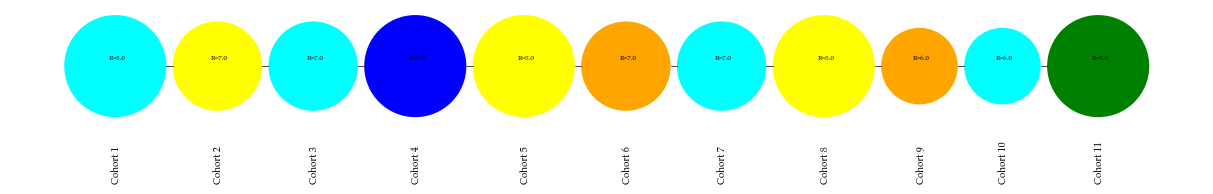

In [11]:
# Caterpillar diagram for entity 92 based on relative analysis
# Showing last 11 cohorts out of available 47 cohorts
cd.generate(data_index=92, n_last_cohorts=11)

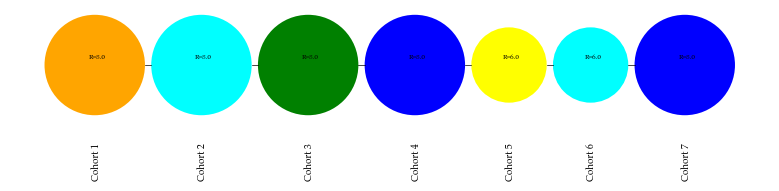

In [12]:
# Caterpillar diagram for entity 153 based on relative analysis
# Showing last seven cohorts out of available 47 cohorts
cd.generate(data_index=153, n_last_cohorts=7)

### Color Schema Transitions

The `schema_transitions` method will count the occurrence of transition from a particular color in a cohort to another color in the next consecutive cohort and creates a transition matrix for applying Markov Chains. 

The relative analysis will utilize the color transitions of all the entities under analysis to forecast the next state transition.

In [13]:
cd.schema_transitions()

Finding transitions


In [14]:
# Instance attribute transition_mat stores the matrix
cd.transition_mat

,red,orange,yellow,cyan,blue,green,grey
red,13,13,0,36,0,0,0
orange,10,1,0,16,0,0,0
yellow,21,13,0,25,1,0,1
cyan,0,0,40,0,28,8,1
blue,3,0,16,0,5,3,11
green,0,0,6,0,4,1,1
grey,15,0,0,0,0,0,130


For example, the matrix above shows that red has transitioned 36 times to the cyan color. 

The above matrix facilitates creating the stationary matrix for the Markov chain.

### Stationary Matrix

In [15]:
# n_sim_iter is the number of times the transition_mat 
# will be multiplied by itself to reach a stationary state

cd.stationary_matrix(n_sim_iter=10**4)

Finding stationary matrix


100% (10000 of 10000) |##################| Elapsed Time: 0:00:12 Time:  0:00:12


,red,orange,yellow,cyan,blue,green,grey
red,0.148306,0.065532,0.150192,0.186501,0.092087,0.029069,0.328313
orange,0.148306,0.065532,0.150192,0.186501,0.092087,0.029069,0.328313
yellow,0.148306,0.065532,0.150192,0.186501,0.092087,0.029069,0.328313
cyan,0.148306,0.065532,0.150192,0.186501,0.092087,0.029069,0.328313
blue,0.148306,0.065532,0.150192,0.186501,0.092087,0.029069,0.328313
green,0.148306,0.065532,0.150192,0.186501,0.092087,0.029069,0.328313
grey,0.148306,0.065532,0.150192,0.186501,0.092087,0.029069,0.328313


The above matrix is the final stationary matrix for all the entities taken together as input for the current relative analysis.

## Absolute Analysis

The Caterpillar Diagram can analyze a single data series and produce a visualization. This kind of analysis is termed here as absolute analysis. The transition matrix of the single time series data will facilitate the forecast of the next-step transition based on this single data series only.

The `caterpillard` package provides the single data series as an example dataset with the `load_series` function.

In [16]:
from caterpillard import load_series

In [17]:
data_ser = load_series()

In [18]:
print(data_ser)

1970       0
1971       0
1972       1
1973       0
1974       0
1975      13
1976       1
1977       1
1978       0
1979     134
1980      74
1981     100
1982     307
1983     445
1984    1110
1985     279
1986    1279
1987    2137
1988    4307
1989    3743
1990    4136
1991    5026
1992    4622
1994    1687
1995    1878
1996    2872
1997    4168
1998    1702
1999    2198
2000    3020
2001    3478
2002    3231
2003    2909
2004    2119
2005    2837
2006    4533
2007    3274
2008    4919
2009    4190
2010    4259
2011    3296
2012    2408
2013    3208
2014    3524
2015    3090
2016    3673
2017    3681
2018    3152
2019    2336
Name: 92, dtype: int64


In [30]:
data_ser.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

### Initialization

Similar to the approach discussed for relative analysis, the `CaterpillarDiagram` class accepts three arguments, viz. `data` for providing Pandas Series. The parameter `relative` should be `False` to mark this as an Absolute analysis. The parameter `output_path` is optional. When undefined by the user, the package will create an output directory, `caterpillard_output.` 

In [19]:
cd_absolute = CaterpillarDiagram(data=data_ser, relative=False, output_path="/tmp/tut_output/")

### Data Summary

In [20]:
cd_absolute.data_summary()

Summarizing Data


### Generate Color Schema

The `color_schema` method will evaluate the color for each cohort.

In [22]:
cd_absolute.color_schema()

The `complete_cohort_df` has first and second differences for the input data series with the assigned `color,` `level,` and `n_color` for each cohort.

In [23]:
cd_absolute.complete_cohort_df.head()

,d11,d12,d2,Cohort,color,level,n_color
0,0.0,1.0,1.0,Cohort1,red,level1,1
1,1.0,-1.0,-2.0,Cohort2,cyan,level4,4
2,-1.0,0.0,1.0,Cohort3,blue,level5,5
3,0.0,13.0,13.0,Cohort4,red,level1,1
4,13.0,-12.0,-25.0,Cohort5,cyan,level4,4


### Caterpillar Size

In [24]:
cd_absolute.caterpillar_size()

Calculating sizes for each cohort


The `caterpillar_size` method will update the `complete_cohort_df` instance attribute.

In [25]:
cd_absolute.complete_cohort_df.head()

,d11,d12,d2,Cohort,color,level,n_color,d11_radius,d12_radius,final_cohort_radius
0,0.0,1.0,1.0,Cohort1,red,level1,1,2,2,2.0
1,1.0,-1.0,-2.0,Cohort2,cyan,level4,4,2,2,2.0
2,-1.0,0.0,1.0,Cohort3,blue,level5,5,2,2,2.0
3,0.0,13.0,13.0,Cohort4,red,level1,1,2,2,2.0
4,13.0,-12.0,-25.0,Cohort5,cyan,level4,4,2,2,2.0


### Caterpillar Diagram Generation

In the Absolute analysis, the `generate` method should not provide the data_index as it is a single data series. Further, if the data series is very long, then the user can provide the integer `n_last_cohort` to generate only the specified number of the cohort from the end. 

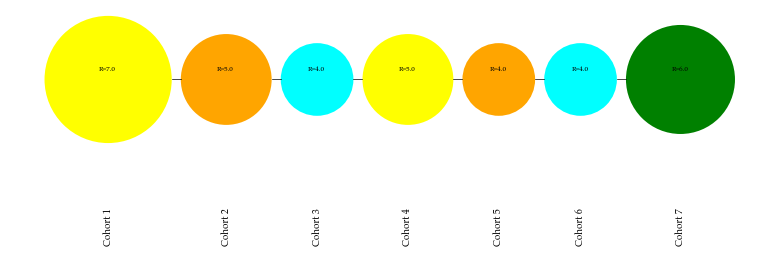

In [26]:
cd_absolute.generate(data_index=None, n_last_cohorts=7)

### Color Schema Transitions

The `schema_transitions` method will count the color change in the consecutive cohorts and create a matrix, as shown below. The generated matrix is available for the user by `transition_mat` as the instance attribute.

In [27]:
cd_absolute.schema_transitions()

Finding transitions


In [28]:
cd_absolute.transition_mat

,red,orange,yellow,cyan,blue,green,grey
red,1,2,0,7,0,0,0
orange,2,0,0,3,0,0,0
yellow,5,3,0,3,0,0,0
cyan,0,0,7,0,3,3,0
blue,1,0,1,0,0,1,0
green,0,0,3,0,0,1,0
grey,0,0,0,0,0,0,0


### Stationary Matrix

The next task is to calculate the stationary matrix of the Markov chain using the method `stationary_matrix.` The `n_sim_iter` parameter required in the method will run the search for the stationarity for the specified number of times.

In [29]:
cd_absolute.stationary_matrix(n_sim_iter=10**4)

Finding stationary matrix


100% (10000 of 10000) |##################| Elapsed Time: 0:00:13 Time:  0:00:13


,red,orange,yellow,cyan,blue,green,grey
red,0.197381,0.107704,0.250169,0.271017,0.062542,0.111186,0.0
orange,0.197381,0.107704,0.250169,0.271017,0.062542,0.111186,0.0
yellow,0.197381,0.107704,0.250169,0.271017,0.062542,0.111186,0.0
cyan,0.197381,0.107704,0.250169,0.271017,0.062542,0.111186,0.0
blue,0.197381,0.107704,0.250169,0.271017,0.062542,0.111186,0.0
green,0.197381,0.107704,0.250169,0.271017,0.062542,0.111186,0.0
grey,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Miscellaneous

### Logging

This package is configure with loggers. The user can take advantage of logging in their scripts. 

### Cite

If you are utilizing this package in your work, then consider citing the same with the following citation:

> [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7607939.svg)](https://doi.org/10.5281/zenodo.7607939)

> P. P. Singh and D. Philip, “An innovative color-coding scheme for terrorism threat
> advisory system,” Methodological Innovations, p. 20597991221144576, Dec. 2022, doi:
> 10.1177/20597991221144577.

